In [1]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import mplfinance as mpf
import matplotlib.dates as mpl_dates
from datetime import datetime
import json
import urllib
import sys
from datetime import *
from tradingeconomics import glob
import ssl
from urllib.request import urlopen

In [2]:
te.login() # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

## Commodittie's performances by Group "LiveStock" - 2010 - 2020

In [3]:
def getCmtName(symbol_list):
    name_list = []
    unit_list = []
    decimals_list = []
    linkAPI = f'https://api.tradingeconomics.com/markets/commodities?c={glob.apikey}'
    response = urlopen(linkAPI)
    code = response.getcode()
    webResults = json.loads(response.read().decode('utf-8'))
    maindf = pd.DataFrame(webResults)
    for symbol in symbol_list:
        symbol_name = maindf.query(f'Symbol == "{symbol}"')
        name_list.append(symbol_name['Name'].values)
        unit_list.append(symbol_name['unit'].values)
        decimals_list.append(symbol_name['decimals'].values)
    dict_map = {
            "name_list": [name_list],
            "unit_list": [unit_list],
            "decimals_list": [decimals_list]
            }
    return dict_map
    
def getHistoricalData(symbol_list, initDate, endDate):
    dataframe_list = []
    for symbol in symbol_list:
        dataframe_list.append(te.fetchMarkets(symbol = symbol, initDate = initDate, endDate = endDate, output_type='df'))
    return dataframe_list
    
def plot(dataframe_list, symbol_list, dict_map):
    i = 0
    for dataframe in dataframe_list:
        fix, ax = plt.subplots(figsize=(15,5))
        
        ax.plot(dataframe['close'], label = dict_map['unit_list'][0][i])
        ax.set_title(f"{dict_map['name_list'][0][i]}", fontsize=20, fontweight='bold')
        i +=1
        ax.grid()
        legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
        legend.get_frame().set_facecolor('C0')
        plt.show()

        
def plotTeste(dataframe_list, symbol_list, dict_map):
    plt.rcParams.update({'figure.autolayout': True})
    fig, axs = plt.subplots(len(symbol_list), 1, figsize=(15, 30))
    i = 0
    for dataframe in dataframe_list:
        axs[i].plot(dataframe['close'], label = dict_map['unit_list'][0][i])
        axs[i].set_title(f"{dict_map['name_list'][0][i]}", fontsize=20, fontweight='bold')
        legend = axs[i].legend(loc='lower left', shadow=True, fontsize='x-large')
        legend.get_frame().set_facecolor('C0')
        axs[i].grid()
        i += 1

def getCmtPerformanceEnergy(symbol_list, initDate, endDate):
    dataframe_list = getHistoricalData(symbol_list, initDate, endDate)
    dict_map = getCmtName(symbol_list)
    plotTeste(dataframe_list, symbol_list, dict_map)

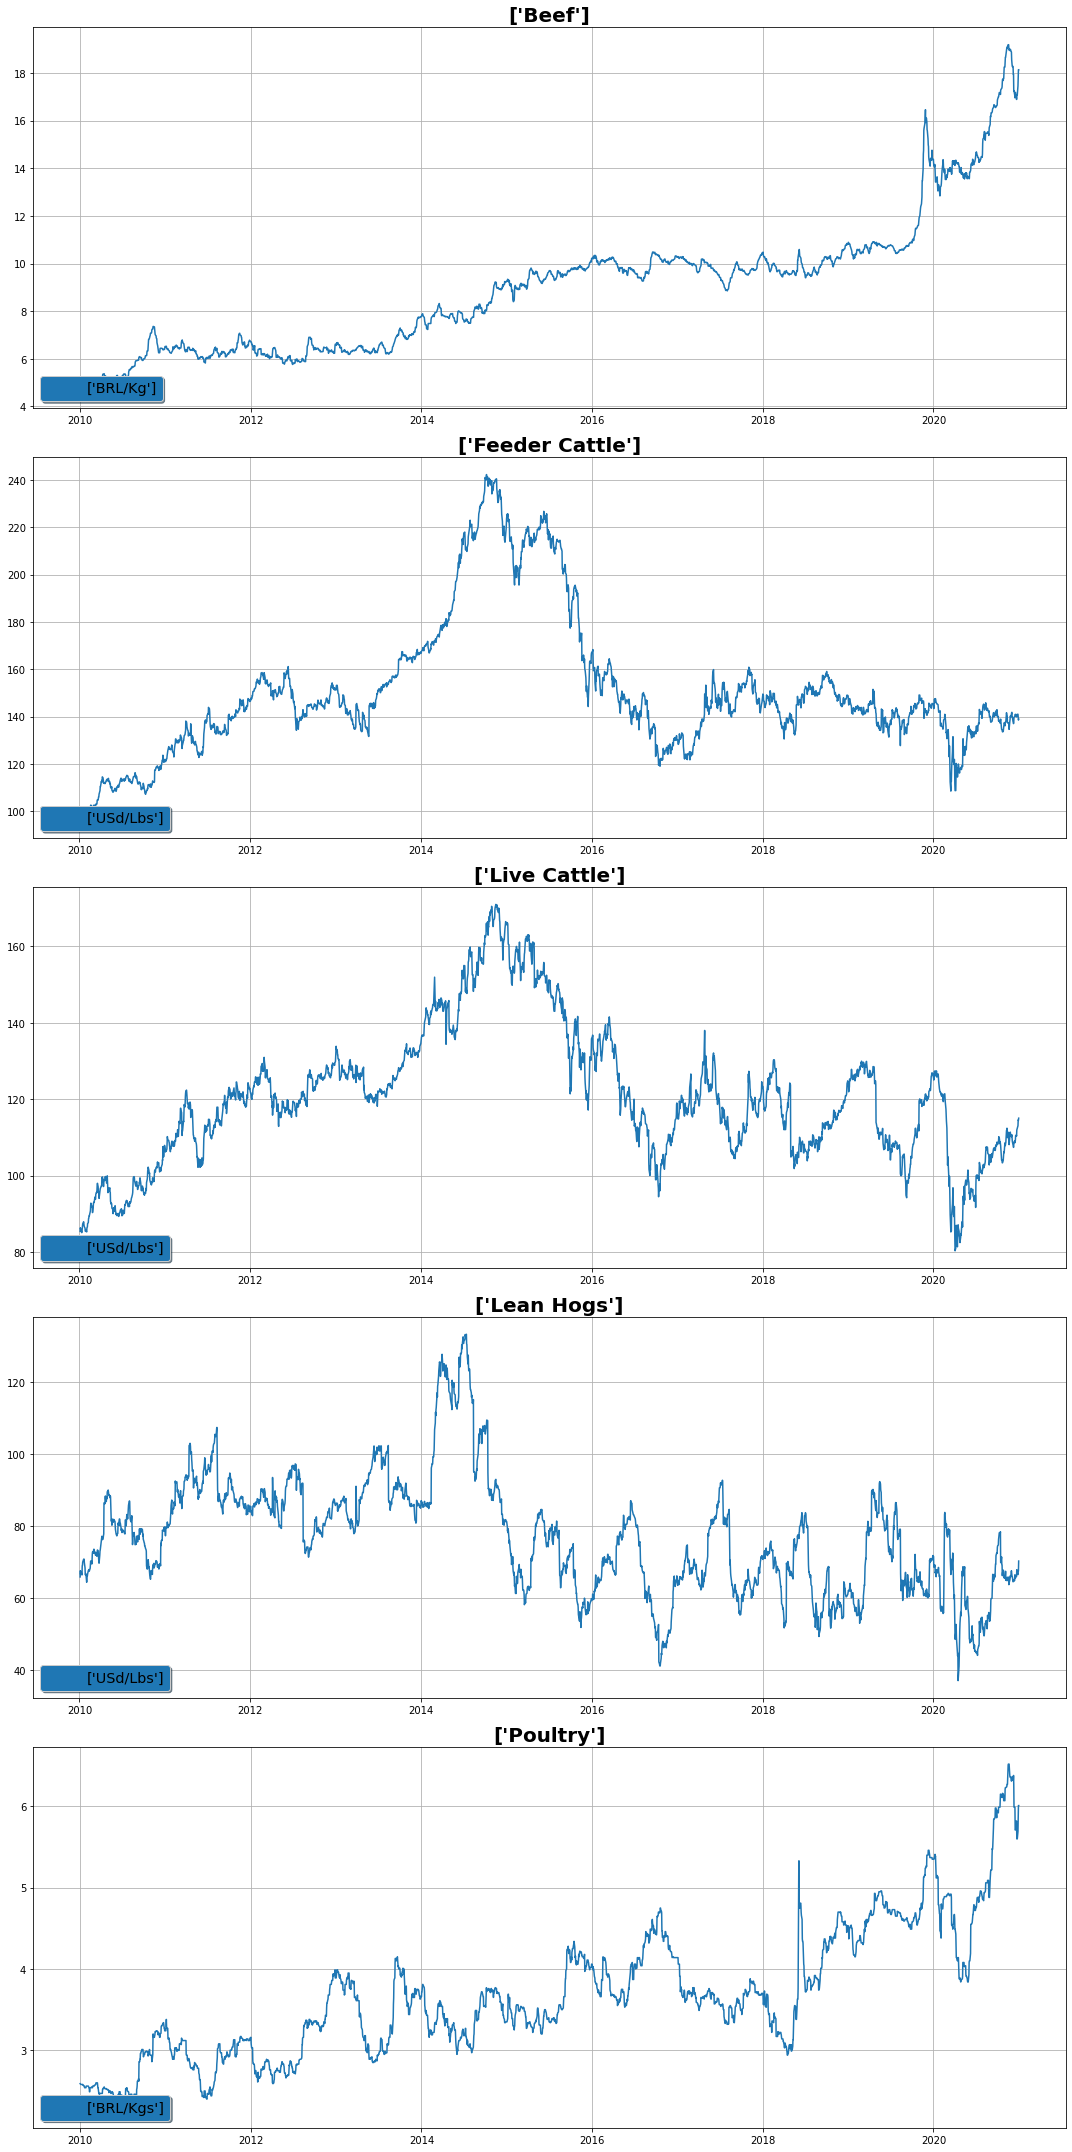

In [4]:
symbol_list = ['BEEF:COM', 'FC1:COM', 'LC1:COM', 'LH1:COM', 'POUL:COM']
initDate = '2010-01-01'
endDate = '2020-12-31'

getCmtPerformanceEnergy(symbol_list, initDate, endDate)